In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

df = pd.read_csv("/home/wojciech/3/Absenteeism_at_work.csv", sep=";")
df.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0


<IPython.core.display.Javascript object>

1. Individual identification (ID)
2. Reason for absence (ICD).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

Reason for absence (ICD)
        
    1 Niektóre choroby zakaźne i pasożytnicze
    2 Nowotwory
    3 Choroby krwi i narządów krwiotwórczych oraz niektóre zaburzenia związane z mechanizmem odpornościowym
    4 Endokrynologiczne , choroby odżywiania i metabolizmu
    5 Zaburzenia psychiczne i zachowania
    6 Choroby układu nerwowego
    7 Choroby oczu i przydatków
    8 Choroby ucha i wyrostka sutkowatego
    9 Choroby układu krążenia
    10 Choroby układu oddechowego
    11 Choroby układu pokarmowego
    12 Choroby skóry i tkanki podskórnej
    13 Choroby układu mięśniowo-szkieletowego i tkanki łącznej
    14 Choroby układu moczowo-płciowego
    15 Ciąża, poród i połóg
    16 Niektóre schorzenia pochodzące z okresu okołoporodowego
    17 Wrodzone wady rozwojowe, deformacje i wady chromosomalne
    18 Objawy, objawy oraz nieprawidłowe wyniki badań klinicznych i laboratoryjnych, gdzie indziej niesklasyfikowane
    19 Urazy, zatrucia i niektóre inne skutki przyczyn zewnętrznych
    20 Zewnętrzne przyczyny zachorowalności i śmiertelności
    21 Czynniki wpływające na stan zdrowia i kontakt ze służbą zdrowia.
    
    
    Oraz 7 kategorii bez obserwacji pacjenta (CID) (22), 
    konsultacji lekarskiej (23), 
    krwiodawstwa (24), 
    badania laboratoryjnego (25), 
    nieobecności nieusprawiedliwionej (26), 
    fizjoterapii (27), 
    konsultacji stomatologicznej (28).

In [3]:
df['Reason for absence'].value_counts().nlargest(10)


23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
Name: Reason for absence, dtype: int64

<IPython.core.display.Javascript object>

In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
df.groupby(["ID", "Reason for absence"]).size()

ID  Reason for absence
1   0                      1
    1                      1
    7                      1
    11                     1
    13                     3
                          ..
36  14                     2
    19                     2
    23                    11
    26                     1
    28                     4
Length: 251, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Son', ylabel='Month of absence'>

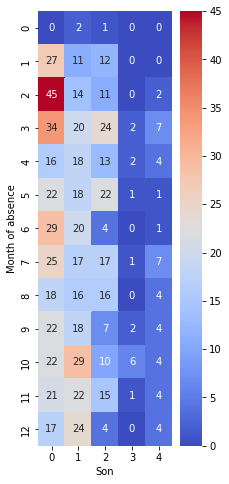

<IPython.core.display.Javascript object>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

PP = pd.crosstab(df["Month of absence"], df.Son)
PP
plt.figure(figsize=(3, 8))
sns.heatmap(PP, cmap="coolwarm", annot=True, cbar=True)

In [7]:
pd.crosstab(
    index=df["Month of absence"], columns=df["Son"], values=df["Son"], aggfunc="mean"
).round()

Son,0,1,2,3,4
Month of absence,,,,,
0,NaN,1.0,2.0,NaN,NaN
1,0.0,1.0,2.0,NaN,NaN
2,0.0,1.0,2.0,NaN,4.0
3,0.0,1.0,2.0,3.0,4.0
4,0.0,1.0,2.0,3.0,4.0
5,0.0,1.0,2.0,3.0,4.0
6,0.0,1.0,2.0,NaN,4.0
7,0.0,1.0,2.0,3.0,4.0
8,0.0,1.0,2.0,NaN,4.0


<IPython.core.display.Javascript object>

In [9]:
dK = df[["Age", "Education", "Son", "Social drinker", "Social smoker", "Pet", "Weight"]]

dK.groupby(["Social smoker"]).count()

,Age,Education,Son,Social drinker,Pet,Weight
Social smoker,,,,,,
0,686,686,686,686,686,686
1,54,54,54,54,54,54


<IPython.core.display.Javascript object>

In [10]:
ufo = pd.read_csv("/media/wojciech/D6DE33C1DE3399271/1A/uforeports.csv")
ufo.head(2)

ufo_new = ufo.groupby("City")["State"].apply("/".join).reset_index()
# ufo_new

FileNotFoundError: [Errno 2] No such file or directory: '/media/wojciech/D6DE33C1DE3399271/1A/uforeports.csv'

<IPython.core.display.Javascript object>

In [11]:
df[df["Social smoker"] == 1].groupby(["Age"]).size().to_frame("size").sort_values(
    "size", ascending=False
)

,size
Age,
40,20
36,8
29,7
39,6
48,6
43,5
46,2


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Month of absence'>

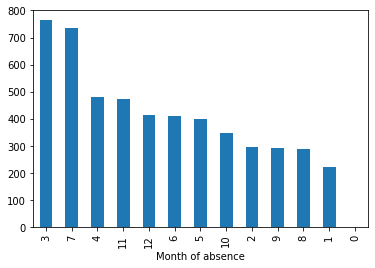

<IPython.core.display.Javascript object>

In [12]:
df.groupby("Month of absence")["Absenteeism time in hours"].sum().sort_values(
    ascending=False
).plot(kind="bar")

In [13]:
df[df["Reason for absence"] == 26].groupby(["Month of absence"]).size().to_frame(
    "size"
).sort_values("size", ascending=False)

,size
Month of absence,
7,9
10,5
12,4
1,3
4,2
6,2
8,2
11,2
2,1


<IPython.core.display.Javascript object>

In [14]:
df.groupby(["Month of absence", "Reason for absence"]).count()[["ID"]]

ID
Month of absence Reason for absence    
0                0                    3
1                3                    1
                 10                   1
                 12                   2
                 13                   3
...                                  ..
12               23                  13
                 25                   2
                 26                   4
                 27                   1
                 28                  12

[187 rows x 1 columns]

<IPython.core.display.Javascript object>

In [15]:
df.groupby(["Month of absence", "Reason for absence"]).count()["ID"]

Month of absence  Reason for absence
0                 0                      3
1                 3                      1
                  10                     1
                  12                     2
                  13                     3
                                        ..
12                23                    13
                  25                     2
                  26                     4
                  27                     1
                  28                    12
Name: ID, Length: 187, dtype: int64

<IPython.core.display.Javascript object>